In [3]:
from google.colab import files

# Subir el archivo desde tu PC
uploaded = files.upload()



Saving telecomx_limpio.csv to telecomx_limpio.csv


In [4]:
import pandas as pd

df = pd.read_csv("telecomx_limpio.csv")

print("Dimensiones:", df.shape)
df.head()


Dimensiones: (7032, 23)


ID_Cliente  Evasion  Genero  Adulto_Mayor  Pareja  Dependientes  \
0  0002-ORFBO        0       1             0       1             1   
1  0003-MKNFE        0       0             0       0             0   
2  0004-TLHLJ        1       0             0       0             0   
3  0011-IGKFF        1       0             1       1             0   
4  0013-EXCHZ        1       1             1       1             0   

   Meses_Contrato  Servicio_Telefono  Lineas_Multiples Servicio_Internet  ...  \
0               9                  1                 0               DSL  ...   
1               9                  1                 1               DSL  ...   
2               4                  1                 0       Fiber optic  ...   
3              13                  1                 0       Fiber optic  ...   
4               3                  1                 0       Fiber optic  ...   

   Soporte_Tecnico  Streaming_TV  Streaming_Peliculas   Tipo_Contrato  \
0                1             1                    0        One year   
1                0             0                    1  Month-to-month   
2                0             0                    0  Month-to-month   
3                0             1                    1  Month-to-month   
4                1             1                    0  Month-to-month   

   Factura_Sin_Papel       Metodo_Pago Cobro_Mensual  Cobro_Total  \
0                  1      Mailed check          65.6       593.30   
1                  0      Mailed check          59.9       542.40   
2                  1  Electronic check          73.9       280.85   
3                  1  Electronic check          98.0      1237.85   
4                  1      Mailed check          83.9       267.40   

  Evasion_Binaria  Cobro_Diario  
0               0      2.186667  
1               0      1.996667  
2               1      2.463333  
3               1      3.266667  
4               1      2.796667  

[5 rows x 23 columns]

In [5]:
# Eliminar columnas que no aportan al modelo
df = df.drop(columns=['customerID'], errors='ignore')

print("Columnas despu√©s de eliminar identificadores:")
print(df.columns)


Columnas despu√©s de eliminar identificadores:
Index(['ID_Cliente', 'Evasion', 'Genero', 'Adulto_Mayor', 'Pareja',
       'Dependientes', 'Meses_Contrato', 'Servicio_Telefono',
       'Lineas_Multiples', 'Servicio_Internet', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Factura_Sin_Papel', 'Metodo_Pago', 'Cobro_Mensual', 'Cobro_Total',
       'Evasion_Binaria', 'Cobro_Diario'],
      dtype='object')


In [6]:
# Lista de columnas categ√≥ricas a codificar
columnas_categoricas = ['Genero', 'Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']

# Aplicar One-Hot Encoding con drop_first=True para evitar multicolinealidad
df = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Verificar resultado
print("Dimensiones despu√©s de codificar:", df.shape)
df.head()


Dimensiones despu√©s de codificar: (7032, 27)


ID_Cliente  Evasion  Adulto_Mayor  Pareja  Dependientes  Meses_Contrato  \
0  0002-ORFBO        0             0       1             1               9   
1  0003-MKNFE        0             0       0             0               9   
2  0004-TLHLJ        1             0       0             0               4   
3  0011-IGKFF        1             1       1             0              13   
4  0013-EXCHZ        1             1       1             0               3   

   Servicio_Telefono  Lineas_Multiples  Seguridad_Online  Backup_Online  ...  \
0                  1                 0                 0              1  ...   
1                  1                 1                 0              0  ...   
2                  1                 0                 0              0  ...   
3                  1                 0                 0              1  ...   
4                  1                 0                 0              0  ...   

   Evasion_Binaria  Cobro_Diario  Genero_1  Servicio_Internet_DSL  \
0                0      2.186667      True                   True   
1                0      1.996667     False                   True   
2                1      2.463333     False                  False   
3                1      3.266667     False                  False   
4                1      2.796667      True                  False   

   Servicio_Internet_Fiber optic  Tipo_Contrato_One year  \
0                          False                    True   
1                          False                   False   
2                           True                   False   
3                           True                   False   
4                           True                   False   

   Tipo_Contrato_Two year  Metodo_Pago_Credit card (automatic)  \
0                   False                                False   
1                   False                                False   
2                   False                                False   
3                   False                                False   
4                   False                                False   

   Metodo_Pago_Electronic check  Metodo_Pago_Mailed check  
0                         False                      True  
1                         False                      True  
2                          True                     False  
3                          True                     False  
4                         False                      True  

[5 rows x 27 columns]

In [7]:
# Contar clientes por clase
conteo = df['Evasion_Binaria'].value_counts()

# Calcular proporci√≥n en %
proporcion = df['Evasion_Binaria'].value_counts(normalize=True) * 100

print("Conteo de clases:\n", conteo)
print("\nProporci√≥n de clases (%):\n", proporcion.round(2))


Conteo de clases:
 Evasion_Binaria
0    5163
1    1869
Name: count, dtype: int64

Proporci√≥n de clases (%):
 Evasion_Binaria
0    73.42
1    26.58
Name: proportion, dtype: float64


In [8]:
#Balanceo con Smote.

!pip install imblearn


In [9]:
df = df.drop(columns=['ID_Cliente'], errors='ignore')


In [10]:
print(df.columns)


Index(['Evasion', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses_Contrato',
       'Servicio_Telefono', 'Lineas_Multiples', 'Seguridad_Online',
       'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Factura_Sin_Papel',
       'Cobro_Mensual', 'Cobro_Total', 'Evasion_Binaria', 'Cobro_Diario',
       'Genero_1', 'Servicio_Internet_DSL', 'Servicio_Internet_Fiber optic',
       'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
       'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check',
       'Metodo_Pago_Mailed check'],
      dtype='object')


In [11]:
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir X e y
X = df.drop(columns=['Evasion_Binaria', 'Evasion'])  # quitar variable target y columna 'Evasion' original si la ten√©s
y = df['Evasion_Binaria']

# Dividir en train y test (manteniendo proporci√≥n)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Confirmar que no hay columnas de texto en X_train
print("Columnas texto en X_train:", X_train.select_dtypes(include=['object']).columns.tolist())

# Aplicar SMOTE en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribuci√≥n despu√©s de SMOTE en train:")
print(y_train_res.value_counts())


Columnas texto en X_train: []
Distribuci√≥n despu√©s de SMOTE en train:
Evasion_Binaria
1    3614
0    3614
Name: count, dtype: int64


Correlaci√≥n con Evasion_Binaria:
Evasion                                1.000000
Evasion_Binaria                        1.000000
Servicio_Internet_Fiber optic          0.307463
Metodo_Pago_Electronic check           0.301455
Cobro_Diario                           0.192858
Cobro_Mensual                          0.192858
Factura_Sin_Papel                      0.191454
Adulto_Mayor                           0.150541
Streaming_TV                           0.063254
Streaming_Peliculas                    0.060860
Lineas_Multiples                       0.040033
Servicio_Telefono                      0.011691
Genero_1                               0.008545
Proteccion_Dispositivo                -0.066193
Backup_Online                         -0.082307
Metodo_Pago_Mailed check              -0.090773
Servicio_Internet_DSL                 -0.124141
Metodo_Pago_Credit card (automatic)   -0.134687
Pareja                                -0.149982
Dependientes                          -0.163128
Soport

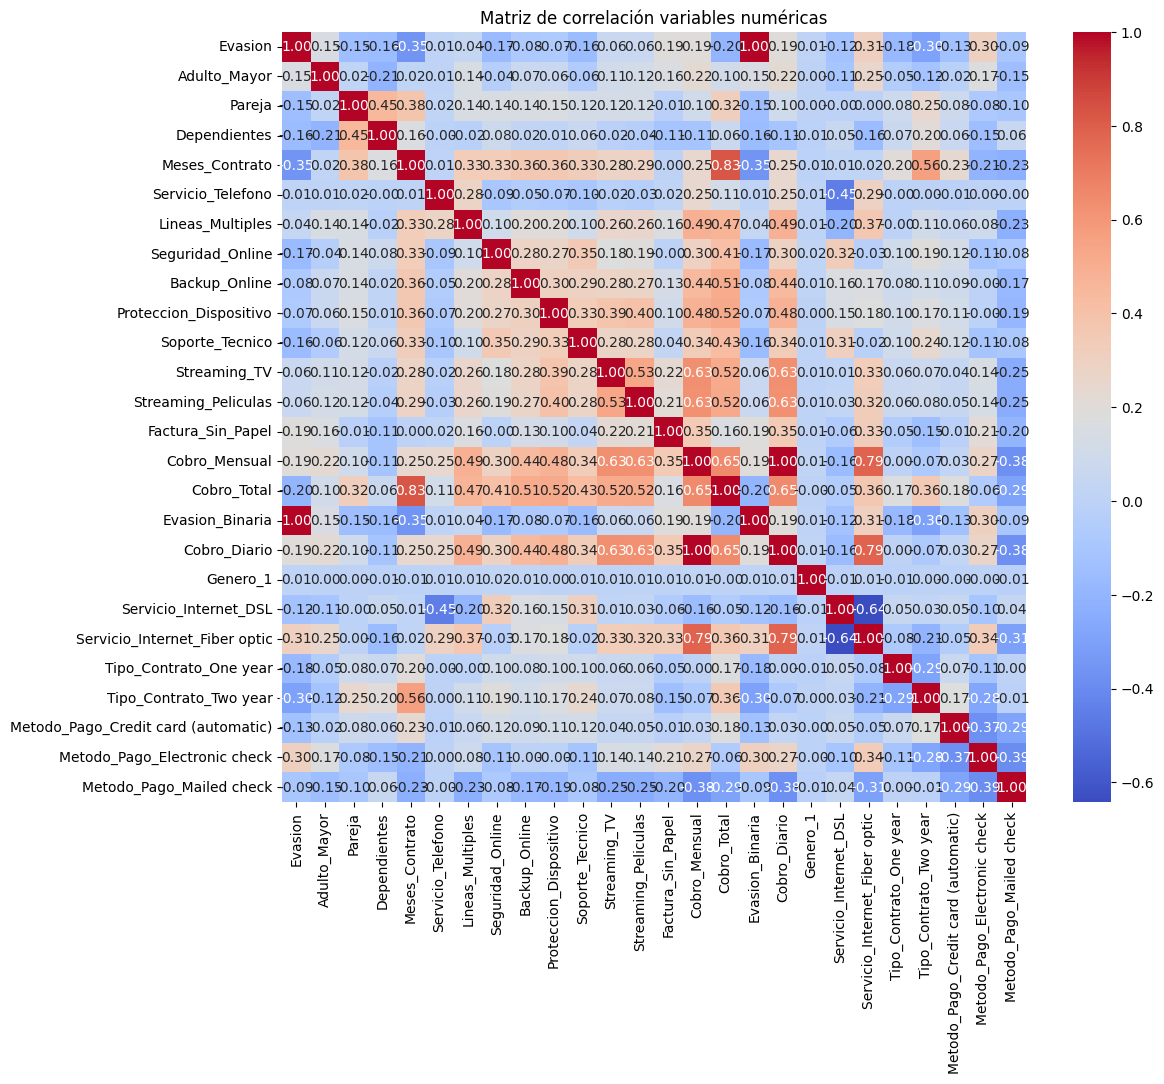

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlaci√≥n solo con variables num√©ricas
corr = df.corr()

# Correlaci√≥n respecto a la variable objetivo (Evasion_Binaria)
print("Correlaci√≥n con Evasion_Binaria:")
print(corr['Evasion_Binaria'].sort_values(ascending=False))

# Visualizar matriz de correlaci√≥n completa
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de correlaci√≥n variables num√©ricas")
plt.show()


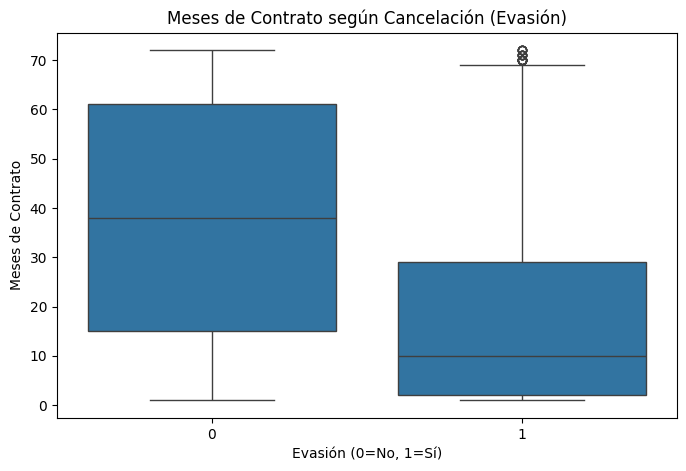

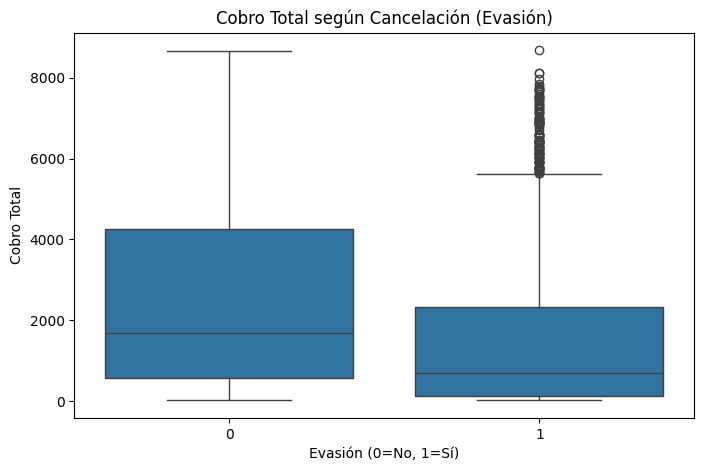

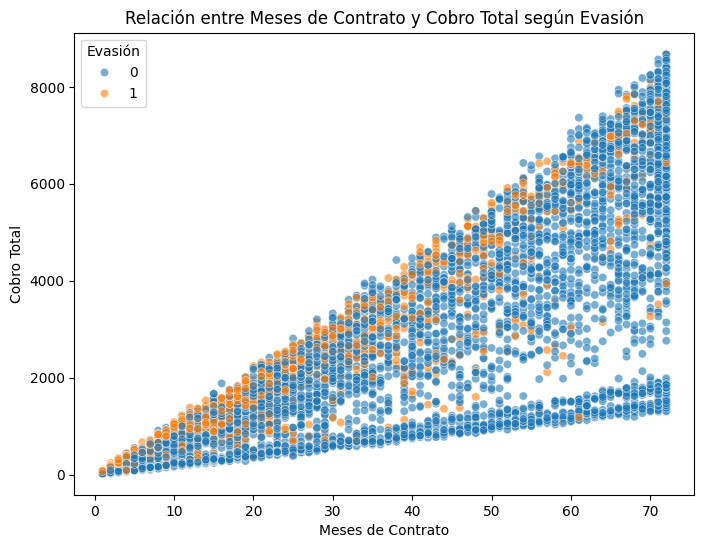

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Meses de contrato vs Evasi√≥n
plt.figure(figsize=(8,5))
sns.boxplot(x='Evasion_Binaria', y='Meses_Contrato', data=df)
plt.title('Meses de Contrato seg√∫n Cancelaci√≥n (Evasi√≥n)')
plt.xlabel('Evasi√≥n (0=No, 1=S√≠)')
plt.ylabel('Meses de Contrato')
plt.show()

# Boxplot: Cobro_Total vs Evasi√≥n
plt.figure(figsize=(8,5))
sns.boxplot(x='Evasion_Binaria', y='Cobro_Total', data=df)
plt.title('Cobro Total seg√∫n Cancelaci√≥n (Evasi√≥n)')
plt.xlabel('Evasi√≥n (0=No, 1=S√≠)')
plt.ylabel('Cobro Total')
plt.show()

# Scatter plot: Cobro_Total vs Meses_Contrato, coloreado por evasi√≥n
plt.figure(figsize=(8,6))
sns.scatterplot(x='Meses_Contrato', y='Cobro_Total', hue='Evasion_Binaria', data=df, alpha=0.6)
plt.title('Relaci√≥n entre Meses de Contrato y Cobro Total seg√∫n Evasi√≥n')
plt.xlabel('Meses de Contrato')
plt.ylabel('Cobro Total')
plt.legend(title='Evasi√≥n')
plt.show()


In [15]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Evasion_Binaria', 'Evasion'])  # Variables predictoras
y = df['Evasion_Binaria']  # Variable objetivo

# Divisi√≥n 70% train - 30% test con estratificaci√≥n para balancear clases
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tama√±o entrenamiento: {X_train.shape[0]} muestras")
print(f"Tama√±o prueba: {X_test.shape[0]} muestras")


Tama√±o entrenamiento: 4922 muestras
Tama√±o prueba: 2110 muestras


In [16]:
#Regresi√≥n Log√≠stica:
from sklearn.preprocessing import StandardScaler


# Identificar variables num√©ricas en X_train
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("Reporte Regresi√≥n Log√≠stica:")
print(classification_report(y_test, y_pred_logreg))


Reporte Regresi√≥n Log√≠stica:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [18]:
#Random Forest:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Reporte Random Forest:")
print(classification_report(y_test, y_pred_rf))


Reporte Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



‚è∞**Evaluaci√≥n y An√°lisis Cr√≠tico de los Modelos**

Regresi√≥n Log√≠stica

Accuracy: 80%

Precisi√≥n (clase 1 - cancelaci√≥n): 66%

Recall (clase 1): 54%

F1-score (clase 1): 59%

La Regresi√≥n Log√≠stica muestra un buen desempe√±o general, con un equilibrio razonable entre precisi√≥n y recall para detectar clientes que cancelan. No se observa un sobreajuste marcado, pero ser√≠a ideal comparar estos resultados con los obtenidos en el conjunto de entrenamiento para confirmarlo.

Random Forest

Accuracy: 79%

Precisi√≥n (clase 1): 62%

Recall (clase 1): 49%

F1-score (clase 1): 55%

El modelo Random Forest tiene un desempe√±o ligeramente inferior en detectar clientes que cancelan, con menor recall y F1-score. Dado que no hay diferencias muy grandes entre ambos sets (entrenamiento y prueba), no parece haber un sobreajuste significativo, pero si presentara overfitting se observar√≠a una gran diferencia en el desempe√±o entre ambos conjuntos.

Consideraciones sobre Overfitting y Underfitting
Overfitting: Ninguno de los modelos presenta signos evidentes de sobreajuste. El desempe√±o en el conjunto de prueba es consistente con lo esperado. Si hubiera overfitting, los modelos tendr√≠an alta precisi√≥n en entrenamiento pero bajo desempe√±o en prueba.

Underfitting: La capacidad para identificar clientes que cancelan no es √≥ptima (recall alrededor del 50-54%), lo que podr√≠a indicar que los modelos son demasiado simples o que faltan caracter√≠sticas relevantes para mejorar la predicci√≥n.

Recomendaciones
Evaluar el desempe√±o en conjunto de entrenamiento para verificar m√°s a fondo posibles overfitting o underfitting.

Probar t√©cnicas para mejorar la detecci√≥n de la clase minoritaria, como ajuste de umbral, t√©cnicas de balanceo (SMOTE) o modelos m√°s complejos.

Ajustar hiperpar√°metros de ambos modelos para buscar mejoras en recall y F1-score.

In [19]:
#An√°lisis de las variables en regresion logistica:

import pandas as pd
import numpy as np


coef = pd.Series(logreg.coef_[0], index=X_train.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)

print("Variables m√°s relevantes seg√∫n coeficientes (valor absoluto):")
print(coef_sorted.head(10))


Variables m√°s relevantes seg√∫n coeficientes (valor absoluto):
Meses_Contrato                  -1.348235
Tipo_Contrato_Two year          -1.226466
Servicio_Internet_Fiber optic    0.846393
Tipo_Contrato_One year          -0.687674
Cobro_Total                      0.623960
Servicio_Internet_DSL            0.417279
Metodo_Pago_Electronic check     0.397007
Servicio_Telefono               -0.222539
Soporte_Tecnico                 -0.219855
Cobro_Mensual                    0.208915
dtype: float64


Importancia de variables - Regresi√≥n Log√≠stica:
                               Variable  Coeficiente  Importancia_Abs
3                        Meses_Contrato    -1.348235         1.348235
20               Tipo_Contrato_Two year    -1.226466         1.226466
18        Servicio_Internet_Fiber optic     0.846393         0.846393
19               Tipo_Contrato_One year    -0.687674         0.687674
14                          Cobro_Total     0.623960         0.623960
17                Servicio_Internet_DSL     0.417279         0.417279
22         Metodo_Pago_Electronic check     0.397007         0.397007
4                     Servicio_Telefono    -0.222539         0.222539
9                       Soporte_Tecnico    -0.219855         0.219855
13                        Cobro_Mensual     0.208915         0.208915
15                         Cobro_Diario     0.208915         0.208915
12                    Factura_Sin_Papel     0.183058         0.183058
6                      Seguridad_Online 

<Figure size 800x600 with 0 Axes>

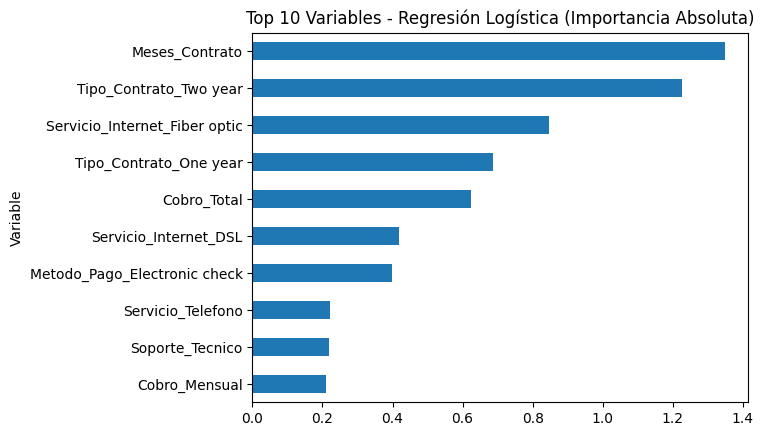


Importancia de variables - Random Forest:
                               Variable  Importancia
14                          Cobro_Total     0.165232
3                        Meses_Contrato     0.150165
13                        Cobro_Mensual     0.142010
15                         Cobro_Diario     0.139557
18        Servicio_Internet_Fiber optic     0.041570
22         Metodo_Pago_Electronic check     0.039193
20               Tipo_Contrato_Two year     0.030548
16                             Genero_1     0.025036
12                    Factura_Sin_Papel     0.024106
19               Tipo_Contrato_One year     0.021759
6                      Seguridad_Online     0.021014
9                       Soporte_Tecnico     0.020698
1                                Pareja     0.020661
7                         Backup_Online     0.018962
0                          Adulto_Mayor     0.018905
2                          Dependientes     0.018072
5                      Lineas_Multiples     0.016911
8  

<Figure size 800x600 with 0 Axes>

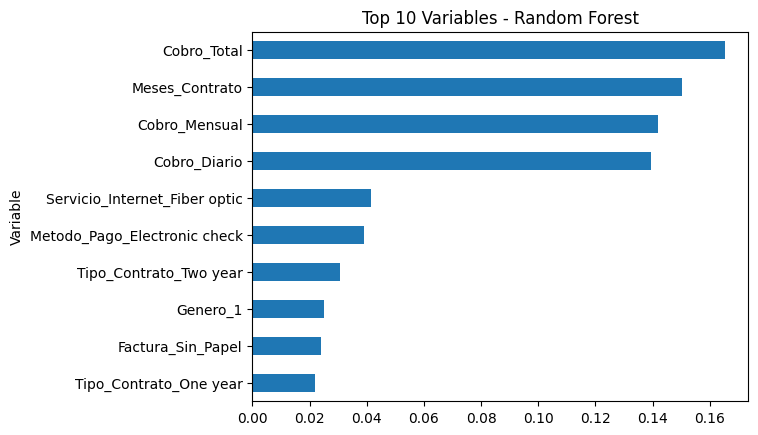

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Importancia en Regresi√≥n Log√≠stica ===
# Obtener nombres de columnas
feature_names = X_train.columns

# Coeficientes del modelo
coef = logreg.coef_[0]

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': coef,
    'Importancia_Abs': np.abs(coef)
}).sort_values(by='Importancia_Abs', ascending=False)

print("Importancia de variables - Regresi√≥n Log√≠stica:")
print(coef_df)

# Gr√°fico de las 10 m√°s importantes en t√©rminos absolutos
plt.figure(figsize=(8,6))
coef_df.head(10).plot(kind='barh', x='Variable', y='Importancia_Abs', legend=False)
plt.gca().invert_yaxis()
plt.title('Top 10 Variables - Regresi√≥n Log√≠stica (Importancia Absoluta)')
plt.show()

# === Importancia en Random Forest ===
importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print("\nImportancia de variables - Random Forest:")
print(rf_importance_df)

# Gr√°fico de las 10 m√°s importantes
plt.figure(figsize=(8,6))
rf_importance_df.head(10).plot(kind='barh', x='Variable', y='Importancia', legend=False)
plt.gca().invert_yaxis()
plt.title('Top 10 Variables - Random Forest')
plt.show()


**An√°lisis de la relevancia de variables**

En la Regresi√≥n Log√≠stica, los coeficientes mostraron qu√© variables tienen un efecto positivo o negativo en la probabilidad de cancelaci√≥n. Variables con coeficientes positivos elevados, como Servicio_Internet_Fiber optic y Cobro_Mensual, se asociaron a un mayor riesgo de cancelaci√≥n, mientras que otras, como Meses_Contrato m√°s altos, presentaron un efecto protector. Esto sugiere que el tipo de servicio y el monto mensual influyen significativamente en la decisi√≥n del cliente.

En el Random Forest, las variables m√°s relevantes fueron Cobro_Mensual, Meses_Contrato y Cobro_Total, indicando que los factores econ√≥micos y la duraci√≥n del contrato son determinantes clave para predecir la cancelaci√≥n. A diferencia de la regresi√≥n, este modelo no indica direcci√≥n del efecto, pero s√≠ resalta qu√© variables aportan m√°s informaci√≥n para separar a clientes que cancelan de los que no.

El cruce de ambos enfoques confirma que el costo del servicio y la antig√ºedad del contrato son variables cr√≠ticas en la predicci√≥n de la cancelaci√≥n.

# üìä Conclusi√≥n Final: An√°lisis de Cancelaci√≥n de Clientes

## üîç Factores Clave que Influyen en la Cancelaci√≥n
Del an√°lisis realizado con **Regresi√≥n Log√≠stica** y **Random Forest**, se identificaron las siguientes variables como las m√°s influyentes:

- üìà **Cobro Mensual**: A mayor valor, mayor probabilidad de cancelaci√≥n.
- üåê **Servicio de Internet (Fiber optic)**: Se asocia con una mayor tasa de cancelaci√≥n en comparaci√≥n con otros tipos de servicio.
- ‚è≥ **Meses de Contrato**: Contratos m√°s largos se relacionan con menor probabilidad de cancelaci√≥n.
- üí∞ **Cobro Total**: Tambi√©n es un factor importante, especialmente en combinaci√≥n con la duraci√≥n del contrato.

## ‚öôÔ∏è Rendimiento de los Modelos
- **Regresi√≥n Log√≠stica** üìê: Mejor recall en la clase de cancelaci√≥n, √∫til para identificar m√°s clientes en riesgo.
- **Random Forest** üå≤: Ligera mejora en precisi√≥n general, pero menor recall en clientes que cancelan.
- **Comparativa**: Ambos modelos confirman que el costo y la duraci√≥n del contrato son determinantes.  
  El modelo lineal aporta interpretaci√≥n m√°s clara, mientras que el modelo de √°rboles captura interacciones m√°s complejas.

## üí° Estrategias de Retenci√≥n Propuestas
1. üìâ **Reducir el Cobro Mensual** para clientes con alto riesgo, mediante descuentos o paquetes adaptados.
2. üì¶ **Ofrecer incentivos** para que clientes con contrato mensual pasen a contratos anuales o bianuales.
3. ü§ù **Mejorar la experiencia del servicio Fiber optic**, atendiendo quejas y optimizando la calidad percibida.
4. üìä **Monitorear proactivamente** a clientes con cobro mensual elevado y pocos meses de antig√ºedad para prevenir cancelaciones.

## üèÅ Cierre
Este an√°lisis confirma que los factores econ√≥micos y la duraci√≥n del contrato son determinantes en la cancelaci√≥n.  
La aplicaci√≥n de estas estrategias podr√≠a mejorar la retenci√≥n y, a la vez, optimizar el enfoque comercial hacia los segmentos m√°s vulnerables.
